In [1]:
import import_ipynb
import Utils
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

importing Jupyter notebook from Utils.ipynb


In [2]:
data = [Utils.dataset.get(False)]
data = np.array(data)
a = data[0][0]
b = data[0][1]
c = data[0][2]
df = pd.DataFrame(a,columns =["x"])
df["y"] = b
df ["label"] = c
print(df.head())

          x         y  label
0  0.691314  0.722554    0.0
1  0.172690 -0.984976    0.0
2  0.381955  3.924181    1.0
3  0.670883  3.741563    1.0
4 -0.309834  0.950791    0.0


(-5.0, 5.0)

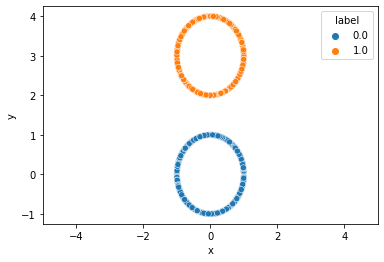

In [3]:
vk=sns.scatterplot(data=df, x="x", y="y", hue="label")
vk.set_xlim(-5,5)

In [4]:
data = [Utils.dataset.get(True)]
data = np.array(data)
a = data[0][0]
b = data[0][1]
c = data[0][2]
df_noise = pd.DataFrame(a,columns =["x"])
df_noise["y"] = b
df_noise ["label"] = c
print(df_noise.head())

          x         y  label
0  0.190044  3.949025    1.0
1 -0.809291  2.386584    1.0
2  0.990143  0.447538    0.0
3 -0.885926  2.654857    1.0
4  0.376988  2.079786    1.0


(-5.0, 5.0)

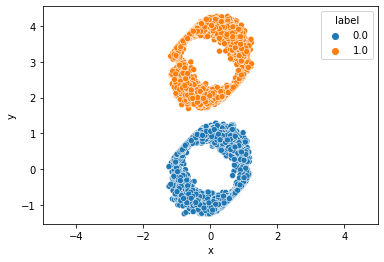

In [5]:
vk=sns.scatterplot(data=df_noise, x="x", y="y", hue="label")
vk.set_xlim(-5,5)

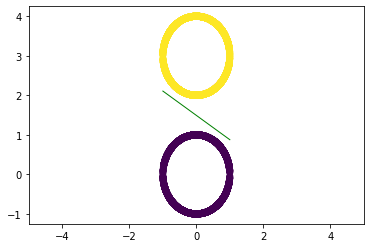

In [6]:
#plotting PTA for  data Without noise
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]
X=np.array(X)
y=np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=10)
p = Utils.PTA(learning_rate=0.1, iters=1000)
p.fit(X_train, y_train)
plot = plt.figure()
vk = plot.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x01= np.amin(X_train[:, 0])
x02= np.amax(X_train[:, 0])
x11= (-p.theta[0] * x01 - p.bias) / p.theta[1]
x12= (-p.theta[0] * x02 - p.bias) / p.theta[1]
vk.plot([x01, x02], [x11, x12], "green",linewidth=1)

vk.set_xlim(-5,5)

plt.show()

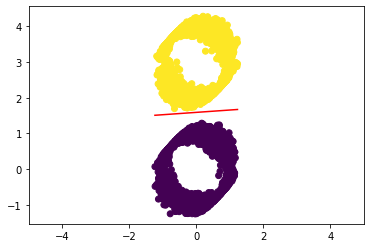

In [7]:
#plotting perceptron for noisy data
X=df_noise.iloc[:,:-1]
y=df_noise.iloc[:,-1:]
X=np.array(X)
y=np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=10)
p = Utils.PTA(learning_rate=0.1, iters=1000)
p.fit(X_train, y_train)
plot = plt.figure()
vk = plot.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)
x01 = np.amin(X_train[:, 0])
x02 = np.amax(X_train[:, 0])
x11 = (-p.theta[0] * x01 - p.bias) / p.theta[1]
x12 = (-p.theta[0] * x02 - p.bias) / p.theta[1]
vk.plot([x01, x02], [x11, x12], "r")
vk.set_xlim(-5,5)

plt.show()

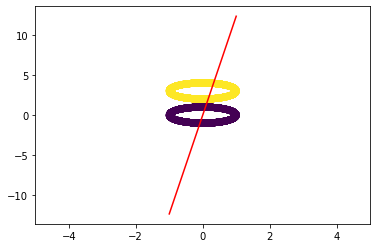

In [8]:
#plotting PTA for  data Without noise and fixed bias
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]

X=np.array(X)
y=np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=10)
p = Utils.PTA_B(learning_rate=0.1, iters=1000)
p.fit(X_train, y_train)
plot = plt.figure()
vk = plot.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x01= np.amin(X_train[:, 0])
x02= np.amax(X_train[:, 0])
x11= (-p.theta[0] * x01 - p.bias) / p.theta[1]
x12= (-p.theta[0] * x02 - p.bias) / p.theta[1]
vk.plot([x01, x02], [x11, x12], "r")

vk.set_xlim(-5,5)

plt.show()

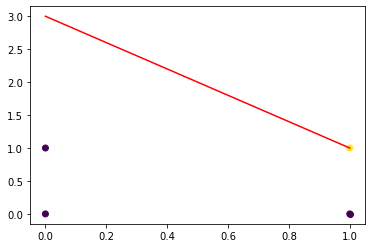

In [34]:
#AND GATE WITH LEARNABLE BIAS
andG = [[0, 0,0], [0, 1,0], [1, 0,0],[1,1,1]]
andG=pd.DataFrame(andG, columns=['x', 'y','output'])
X=andG.iloc[:,:-1]
y=andG.iloc[:,-1:]
X=np.array(X)
y=np.array(y)
p = Utils.PTA(learning_rate=0.5, iters=1000)
p.fit(X, y)
plot = plt.figure()
vk = plot.add_subplot(1, 1, 1)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)
plt.scatter(1,0,c=0)
x01= np.amin(X[:, 0])
x02= np.amax(X[:, 0])
x11= (-p.theta[0] * x01 - p.bias) / p.theta[1]
x12= (-p.theta[0] * x02 - p.bias) / p.theta[1]
vk.plot([x01, x02], [x11, x12], "r")
plt.show()

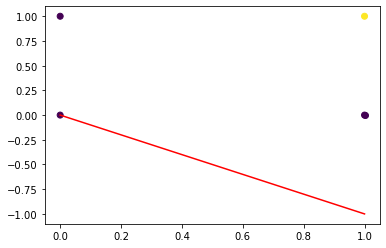

In [18]:
#AND GATE WITH FIXED BIAS
andG = [[0, 0,0], [0, 1,0], [1, 0,0],[1,1,1]]
andG=pd.DataFrame(andG, columns=['x', 'y','output'])
X=andG.iloc[:,:-1]
y=andG.iloc[:,-1:]
X=np.array(X)
y=np.array(y)
p = Utils.PTA_B(learning_rate=0.01, iters=1000)
p.fit(X, y)
plot = plt.figure()
vk = plot.add_subplot(1, 1, 1)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)
plt.scatter(1,0,c=0)
x01= np.amin(X[:, 0])
x02= np.amax(X[:, 0])
x11= (-p.theta[0] * x01 - p.bias) / p.theta[1]
x12= (-p.theta[0] * x02 - p.bias) / p.theta[1]
vk.plot([x01, x02], [x11, x12], "r")



plt.show()

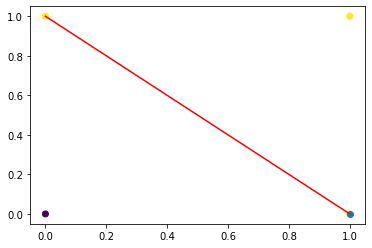

In [38]:
#OR GATE WITH LEARNABLE BIAS
OrG = [[0, 0,0], [0, 1,1], [1, 0,1],[1,1,1]]
OrG=pd.DataFrame(OrG, columns=['x', 'y','output'])
X=OrG.iloc[:,:-1]
y=OrG.iloc[:,-1:]
X=np.array(X)
y=np.array(y)
p = Utils.PTA(learning_rate=1, iters=1000)
p.fit(X, y)
plot = plt.figure()
vk = plot.add_subplot(1, 1, 1)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)
plt.scatter(1,0)
x01= np.amin(X[:, 0])
x02= np.amax(X[:, 0])
x11= (-p.theta[0] * x01 - p.bias) / p.theta[1]
x12= (-p.theta[0] * x02 - p.bias) / p.theta[1]
vk.plot([x01, x02], [x11, x12], "r")
plt.show()

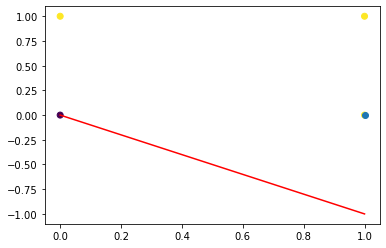

In [39]:
#OR GATE WITH FIXED BIAS
OrG = [[0, 0,0], [0, 1,1], [1, 0,1],[1,1,1]]
OrG=pd.DataFrame(OrG, columns=['x', 'y','output'])
X=OrG.iloc[:,:-1]
y=OrG.iloc[:,-1:]
X=np.array(X)
y=np.array(y)
# X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=10)
p = Utils.PTA_B(learning_rate=0.01, iters=1000)
p.fit(X, y)
plot = plt.figure()
vk = plot.add_subplot(1, 1, 1)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)
plt.scatter(1,0)
x01= np.amin(X[:, 0])
x02= np.amax(X[:, 0])
x11= (-p.theta[0] * x01) / p.theta[1]
x12= (-p.theta[0] * x02 ) / p.theta[1]
vk.plot([x01, x02], [x11, x12], "r")
plt.show()

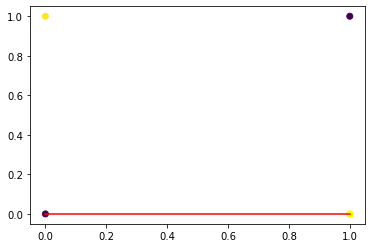

In [22]:
#XOR GATE WITH LEARNABLE BIAS
XOrG = [[0,0,0], [0,1,1], [1,0,1],[1,1,0]]
XOrG=pd.DataFrame(XOrG, columns=['x', 'y','output'])
X_XOR=XOrG.iloc[:,:-1]
y_XOR=XOrG.iloc[:,-1:]
X_XOR=np.array(X_XOR)
y_XOR=np.array(y_XOR)
# X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=10)
p = Utils.PTA(learning_rate=0.02, iters=1000)
p.fit(X_XOR, y_XOR)
plot = plt.figure()
vk = plot.add_subplot(1, 1, 1)
plt.scatter(X_XOR[:, 0], X_XOR[:, 1], marker="o", c=y_XOR)
x01= np.amin(X_XOR[:, 0])
x02= np.amax(X_XOR[:, 0])
x11= (-p.theta[0] * x01 - p.bias) / p.theta[1]
x12= (-p.theta[0] * x02 - p.bias) / p.theta[1]
vk.plot([x01, x02], [x11, x12], "r")
plt.scatter(1,0,c='yellow')
plt.show()

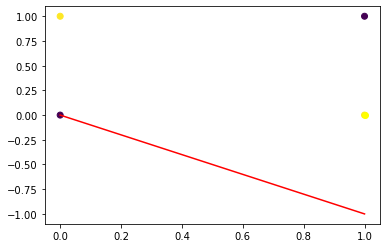

In [23]:
#XOR GATE WITH FIXED BIAS
XOrG = [[0,0,0], [0,1,1], [1,0,1],[1,1,0]]
XOrG=pd.DataFrame(XOrG, columns=['x', 'y','output'])
X_XOR=XOrG.iloc[:,:-1]
y_XOR=XOrG.iloc[:,-1:]
X_XOR=np.array(X_XOR)
y_XOR=np.array(y_XOR)
# X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=10)
p = Utils.PTA_B(learning_rate=0.02, iters=1000)
p.fit(X_XOR, y_XOR)
plot = plt.figure()
vk = plot.add_subplot(1, 1, 1)
plt.scatter(X_XOR[:, 0], X_XOR[:, 1], marker="o", c=y_XOR)
x01= np.amin(X_XOR[:, 0])
x02= np.amax(X_XOR[:, 0])
x11= (-p.theta[0] * x01 - p.bias) / p.theta[1]
x12= (-p.theta[0] * x02 - p.bias) / p.theta[1]
vk.plot([x01, x02], [x11, x12], "r")
plt.scatter(1,0,c='yellow')
plt.show()